**Задание 1**

In [67]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
# сгенерируем набор данных

np.random.seed(1234)

data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [68]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred, L1 = False, L2 = False):
    y = X.dot(w)
    if L2:
       LW = 0.1/2*np.sum(w.T.dot(w))
    if L1:
       LW = 0.1*np.sum(np.abs(w))
    else:
       LW = 0
    return (sum((y - y_pred)**2)) / len(y)

In [69]:
#Стохастический градиентный спуск
# инициализируем начальный вектор весов

def SGD(L1=False, L2=False):
      w = np.zeros(2)

      # список значений ошибок после каждой итерации
      errors_st = []

      # шаг градиентного спуска
      eta = 0.01

      # максимальное число итераций
      max_iter = 1e5
      #1e5

      # критерий сходимости (разница весов, при которой алгоритм останавливается)
      min_weight_dist = 1e-8

      # зададим начальную разницу весов большим числом
      weight_dist = np.inf

      # счетчик итераций
      iter_num = 0

      if L2:
            LW = 0.1*np.sum(w)
      if L1:
            LW = 0.1*np.sum(np.sign(w))
      else:
            LW = 0

      # ход градиентного спуска
      while weight_dist > min_weight_dist and iter_num < max_iter:
          
          # генерируем случайный индекс объекта выборки
          train_ind = np.random.randint(data.shape[0])
          
          new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])+LW) / target.shape[0]
          weight_dist = np.linalg.norm(new_w - w, ord=2)
          

          errors_st.append(mserror(data, new_w, target, L1, L2))
          
          iter_num += 1
          w = new_w
          


      print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_st[-1], 4)}')
      return errors_st

In [70]:
def GD(L1=False, L2=False):
      #Градиентный спуск

      # инициализируем начальный вектор весов
      w = np.zeros(2)

      # список значений ошибок после каждой итерации
      errors = []

      # шаг градиентного спуска
      eta = 0.01

      # максимальное число итераций
      max_iter = 1e5
      #1e5

      # критерий сходимости (разница весов, при которой алгоритм останавливается)
      min_weight_dist = 1e-8

      # зададим начальную разницу весов большим числом
      weight_dist = np.inf

      # счетчик итераций
      iter_num = 0



      # ход градиентного спуска
      while weight_dist > min_weight_dist and iter_num < max_iter:
          
          # генерируем случайный индекс объекта выборки
          #train_ind = np.random.randint(data.shape[0])
          
          if L2:
            LW = 0.1*np.sum(w)
          if L1:
            LW = 0.1*np.sum(np.sign(w))
          else:
            LW = 0

          new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)+LW) / target.shape[0]
          weight_dist = np.linalg.norm(new_w - w, ord=2)
          

          errors.append(mserror(data, new_w, target, L1, L2))
          
          iter_num += 1
          w = new_w

      print(f'В случае использования  градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
      return errors

In [71]:
errors = GD()
errors_st = SGD()

В случае использования  градиентного спуска функционал ошибки составляет 38.5683
В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494


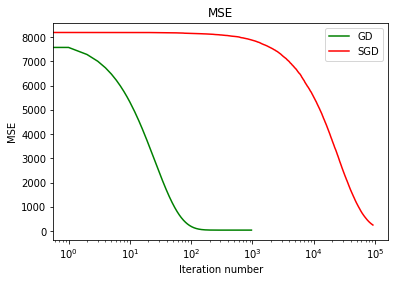

In [72]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors, color='g', label = 'GD')
plt.plot(range(len(errors_st)), errors_st, color='r', label = 'SGD')
plt.title('MSE')
plt.xscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Вывод: стохастический градиентный спус сходится медленнее обычного градиентного спуска

**Задание 2**

In [80]:
errors = GD(L2 = True)
errors_st = SGD(L2 = True)

В случае использования  градиентного спуска функционал ошибки составляет 38.5683
В случае использования стохастического градиентного спуска функционал ошибки составляет 867.5857


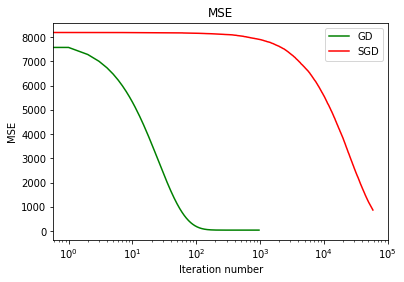

In [81]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors, color='g', label = 'GD')
plt.plot(range(len(errors_st)), errors_st, color='r', label = 'SGD')
plt.title('MSE')
plt.xscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Стохастический градиентный спуск стал сходиться медленнее

**Задание 3**

In [77]:
errors = GD(L1 = True)
errors_st = SGD(L1 = True)

В случае использования  градиентного спуска функционал ошибки составляет 38.5683
В случае использования стохастического градиентного спуска функционал ошибки составляет 3791.2806


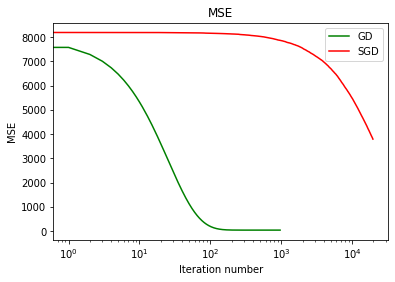

In [78]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors, color='g', label = 'GD')
plt.plot(range(len(errors_st)), errors_st, color='r', label = 'SGD')
plt.title('MSE')
plt.xscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()